In [1]:
# plot_euler_gamma.ipynb
# Cell 1

import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget


def factorial_recursive(n):
    if n == 0:
        return 1
    else:
        return int(n) * factorial_recursive(n - 1)


def f(x, s):
    try:#scope that attempets and if it crashes goes to error exception
        return np.power(x, s - 1) * np.exp(-x)
    except ZeroDivisionError:
        return 0


def simpsons_rule(f, s, a, b, intervals):
    dx = (b - a) / intervals
    area = f(a, s) + f(b, s)
    for i in range(1, int(intervals)):
        area += f(a + i * dx, s) * (2 * (i % 2 + 1))
    return dx / 3 * area


def euler_gamma(s):
    return simpsons_rule(f, s, 0, 1e3, 1e5)


def factorial_gamma(x):
    return np.round(euler_gamma(x + 1), 5)


def plot(ax, zoom):
    xa = np.linspace(0, 5, 100)

    ax.plot(xa, factorial_gamma(xa), label=r"$\Gamma \left( x + 1 \right)$")

    n = [factorial_recursive(i) for i in range(6)]

    ax.plot(range(len(n)), n, color="red", marker="o", label="$n!$")

    ax.set_title("Factorial Via Euler's Gamma Function")
    ax.set_xlabel("x")
    ax.set_ylabel("Factorial (x)")
    ax.grid()
    ax.legend(loc="best")

    ax.set_xlim(0, 5.1)

    if zoom:
        ax.set_xlim(0, 2.1)
        ax.set_ylim(0.5, 2.1)


def plot_euler_gamma(zoom=False):
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax, zoom)
    plt.show()


plot_euler_gamma()

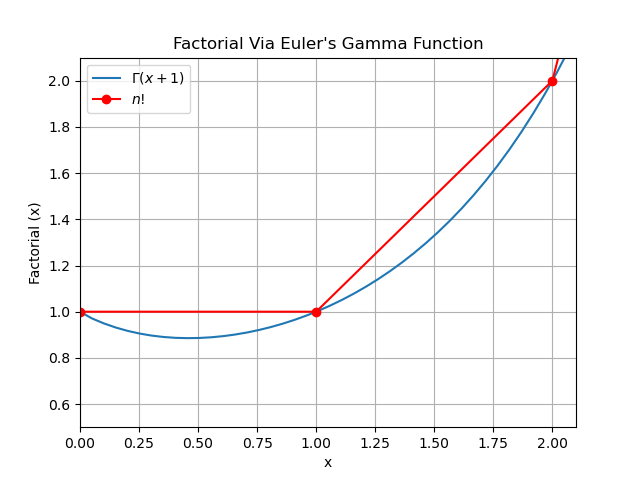

In [3]:
# Cell 2

plot_euler_gamma(zoom=True)